In [12]:
import uproot 
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import math
from scipy.fft import fft, fftfreq
import plotly.subplots as px
import plotly.io as pio
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

import os
from plotly.subplots import make_subplots
from plotly import tools
import plotly.offline as pyo
import sys
from tqdm import tqdm

In [13]:
#    lines_nu = [line_nu.rstrip() for line_nu in file]
with open('/Users/juliagao/Desktop/1muNp.log') as file:
    lines_nu = [line_nu.rstrip() for line_nu in file]
#with open('/Users/danielcarber/Documents/ICARUS/NuMI_Numu/1e1p/output_data.log') as file:
#    lines_data = [line_data.rstrip() for line_data in file]
with open('/Users/juliagao/Desktop/1muNp.log') as file:
    lines_data = [line_data.rstrip() for line_data in file]
for i in range(10):
    print(lines_nu[i][0])

S
S
S
S
S
S
S
S
S
S


In [22]:
df_signal_nu = {'Type': [], 'Run': [], 'Evt': [], 'Subrun':[],'File':[],'Nu_id':[],'Image_id':[],'Interaction_id':[], 'Category':[],
     'Category_topology':[],'category_interaction_mode':[],'leading_electron_ke_true':[], 'leading_electron_ke_reco':[],
     'leading_proton_ke_true':[],'leading_proton_ke_reco':[],'leading_electron_pid_true':[], 'leading_electron_pid_reco':[],
     'leading_proton_pid_true':[],'leading_proton_pid_reco':[],'visible_energy_true':[],'visible_energy_reco':[],'leading_electron_pt_true':[],
     'leading_electron_pt_reco':[],'leading_proton_pt_true':[],'leading_proton_pt_reco':[],'electron_angle_polar_angle_true':[],
     'leading_electron_polar_angle_reco':[],'electron_azimuthal_angle_true':[],'electron_azimuthal_angle_reco':[],
     'opening_angle_true':[],'opening_angle_reco':[],'interaction_pt_true':[],'interaction_pt_reco':[],
     'phiT_true':[],'phiT_reco':[],'alphaT_true':[],'alphaT_reco':[],'electron_softmax':[],'proton_softmax':[],
     'all_1mu1p_cut':[],'all_1muNp_cut':[],'all_1muX_cut':[],'End':[]}

#Selected is reco interactions matched with true interactions
df_selected_nu =  {'Type': [], 'Run': [], 'Evt': [], 'Subrun':[],'File':[],'Nu_id':[],'Image_id':[],'Interaction_id':[], 'Category':[],
     'Category_topology':[],'category_interaction_mode':[],'leading_electron_ke_true':[], 'leading_electron_ke_reco':[],
     'leading_proton_ke_true':[],'leading_proton_ke_reco':[],'leading_electron_pid_true':[], 'leading_electron_pid_reco':[],
     'leading_proton_pid_true':[],'leading_proton_pid_reco':[],'visible_energy_true':[],'visible_energy_reco':[],'leading_electron_pt_true':[],
     'leading_electron_pt_reco':[],'leading_proton_pt_true':[],'leading_proton_pt_reco':[],'electron_angle_polar_angle_true':[],
     'leading_electron_polar_angle_reco':[],'electron_azimuthal_angle_true':[],'electron_azimuthal_angle_reco':[],
     'opening_angle_true':[],'opening_angle_reco':[],'interaction_pt_true':[],'interaction_pt_reco':[],
     'phiT_true':[],'phiT_reco':[],'alphaT_true':[],'alphaT_reco':[],'electron_softmax':[],'proton_softmax':[],
     'all_1mu1p_cut':[],'all_1muNp_cut':[],'all_1muX_cut':[],'End':[]}

list_df_MC = ['Type', 'Run', 'Evt', 'Subrun','File','Nu_id','Image_id','Interaction_id', 'Category',
     'Category_topology','category_interaction_mode','leading_electron_ke_true', 'leading_electron_ke_reco',
     'leading_proton_ke_true','leading_proton_ke_reco','leading_electron_pid_true', 'leading_electron_pid_reco',
     'leading_proton_pid_true','leading_proton_pid_reco','visible_energy_true','visible_energy_reco','leading_electron_pt_true',
     'leading_electron_pt_reco','leading_proton_pt_true','leading_proton_pt_reco','electron_angle_polar_angle_true',
     'leading_electron_polar_angle_reco','electron_azimuthal_angle_true','electron_azimuthal_angle_reco',
     'opening_angle_true','opening_angle_reco','interaction_pt_true','interaction_pt_reco',
     'phiT_true','phiT_reco','alphaT_true','alphaT_reco','electron_softmax','proton_softmax','all_1mu1p_cut','all_1muNp_cut','all_1muX_cut',"End"]


#Fills the dictionaries with data            
for line_nu in lines_nu:
    line_nu = line_nu.split(",")
    #print(line_nu[0])
    if line_nu[0] == 'SIGNAL':
        for i in range(len(line_nu)):
            df_signal_nu[list_df_MC[i]].append(line_nu[i])
    elif line_nu[0] == 'SELECTED':
        for i in range(len(line_nu)):
            df_selected_nu[list_df_MC[i]].append(line_nu[i])
print(lines_nu[0])
            
df_data= {'Type': [], 'Run': [], 'Evt': [], 'Subrun':[],'Image_id':[],'Interaction_id':[], 'leading_electron_ke_reco':[],
     'leading_proton_ke_reco':[],'visible_energy_reco':[],
     'leading_electron_pt_reco':[],'leading_proton_pt_reco':[],
     'leading_electron_polar_angle_reco':[],'electron_azimuthal_angle_reco':[],
     'opening_angle_reco':[],'interaction_pt_reco':[],
     'phiT_reco':[],'alphaT_reco':[],'electron_softmax':[],'proton_softmax':[],'all_1mu1p_cut':[],'all_1muNp_cut':[],'all_1muX_cut':[],'End':[]}
list_df = ['Type', 'Run', 'Evt', 'Subrun','Image_id','Interaction_id', 'leading_electron_ke_reco',
     'leading_proton_ke_reco','visible_energy_reco',
     'leading_electron_pt_reco','leading_proton_pt_reco',
     'leading_electron_polar_angle_reco','electron_azimuthal_angle_reco',
     'opening_angle_reco','interaction_pt_reco',
     'phiT_reco','alphaT_reco','electron_softmax','proton_softmax','all_1mu1p_cut','all_1muNp_cut','all_1muX_cut',"End"]
print(lines_data[0])
for line_data in lines_data:
    line_data = line_data.split(",")
    if line_data[0] == 'DATA':
        for i in range(len(line_data)):
            df_data[list_df[i]].append(line_data[i])      

SIGNAL,1,20,0,detsim_2d_icarus_fitFR_refactored_detsim_stage0_stage1_81727570_0.root,0,1.000000,0.000000,4.000000,4.000000,1.000000,2967.973937,3104.289551,37.530912,-1.000000,1,1,4,1,1984.649756,3665.038619,978.272827,902.393982,227.948593,3.612291,0.335830,0.294900,0.111861,0.049957,0.686529,2.061585,1597.116540,1107.160174,-nan,-nan,2.864149,3.034842,0.999865,0.000000,0,0,1,
SIGNAL,1,20,0,detsim_2d_icarus_fitFR_refactored_detsim_stage0_stage1_81727570_0.root,0,1.000000,0.000000,4.000000,4.000000,1.000000,2967.973937,3104.289551,37.530912,-1.000000,1,1,4,1,1984.649756,3665.038619,978.272827,902.393982,227.948593,3.612291,0.335830,0.294900,0.111861,0.049957,0.686529,2.061585,1597.116540,1107.160174,-nan,-nan,2.864149,3.034842,0.999865,0.000000,0,0,1,


In [28]:
def MC_selection(df_selected_nu,variable):
    signal,sel_1mu, sel_1mu1pi1p, sel_numu_other, sel_NC, sel_cosmic,sel_numu,sel_other = [],[],[],[],[],[],[],[]
    total_events =0
    for index, category in enumerate(df_selected_nu['Category_topology']):
        
        if df_selected_nu['all_1muNp_cut'][index] == '1' or df_selected_nu['all_1muNp_cut'][index] == '1':
            
            total_events +=1
            if (category[0] == '0' or category[0] == '2'):
                #print(df_selected_nu['File'][index])
                signal.append(float(df_selected_nu[variable][index]))
            elif (category[0] == '4' or category[0] == '3' or category[0] == '1'):
                sel_numu_other.append(float(df_selected_nu[variable][index]))
            elif category[0] == '5':
                sel_NC.append(float(df_selected_nu[variable][index]))
            elif category[0] == '6':
                sel_cosmic.append(float(df_selected_nu[variable][index]))
            elif category[0] == '7':
                sel_numu.append(float(df_selected_nu[variable][index]))
            else:
                #print()
                sel_other.append(float(df_selected_nu[variable][index]))
    print(len(signal), len(sel_1mu), len(sel_1mu1pi1p), len(sel_numu_other), len(sel_NC), len(sel_cosmic), len(sel_numu), len(sel_other))
    return signal,sel_1mu, sel_1mu1pi1p, sel_numu_other, sel_NC, sel_cosmic,sel_numu,sel_other, total_events

In [29]:
def data_selection(df_data,variable):
    data_1muNp = []
    for index,i in enumerate(df_data['all_1muNp_cut']):
        if int(i[0]) == 1:
            #if int(i[0]) == 0:
            data_1muNp.append(float(df_data[variable][index]))
    for index,i in enumerate(df_data['all_1muNp_cut']):
        if int(i[0]) == 1:
            #if int(i[0]) == 0:
            data_1muNp.append(float(df_data[variable][index]))
    return data_1muNp

In [30]:
def hist_1d(metric, bounds,bins, xaxis_name, Plot_title, selection):
    fig = make_subplots(rows=1,cols=1,subplot_titles = (f"<span style='font-size: 42px;'>{Plot_title}",))
    
    signal,sel_1mu, sel_1mu1pi1p, sel_numu_other, sel_NC, sel_cosmic,sel_numu,sel_other,total_events = MC_selection(df_selected_nu,metric)
    
    print('Purity: ', len(signal)/total_events)
    print('Number of signal: ',len(signal),' Number of selected:', total_events)
    cosmic_size = len(sel_cosmic)
    numu_size = len(sel_numu)
    NC_size = len(sel_NC)
    signal_size = len(signal)
    numu_size = len(sel_numu_other)
    other_size = len(sel_other)
    
    
    fig.add_trace(go.Histogram(x=sel_cosmic,marker_color = 'yellow',xbins=dict(start = bins[0],end = bins[1],size=bins[2]),
                               name = f'Cosmics ({cosmic_size}, {100*cosmic_size/total_events:.2f}%)'),row = 1, col =1)
    fig.add_trace(go.Histogram(x=sel_numu,marker_color = 'blue',xbins=dict(start = bins[0],end = bins[1],size=bins[2]),
                              name = f'\u03BD<sub>\u03BC</sub> ({numu_size}, {100*numu_size/total_events:.2f}%)'),row = 1, col =1)
    fig.add_trace(go.Histogram(x=sel_NC,marker_color = 'black',xbins=dict(start = bins[0],end = bins[1],size=bins[2]),
                              name = f'NC ({NC_size}, {100*NC_size/total_events:.2f}%)'),row = 1, col =1)
    fig.add_trace(go.Histogram(x=sel_other,marker_color = 'purple',xbins=dict(start = bins[0],end = bins[1],size=bins[2]),
                              name = f'Other ({other_size}, {100*other_size/total_events:.2f}%)'),row = 1, col =1)
    
    if selection != 'Numu':
        #numu_size =  len(df[metric][mask_other_numu][reco_signal][mask])
        fig.add_trace(go.Histogram(x=sel_numu_other,marker_color = 'orange',xbins=dict(start = bins[0],end = bins[1],size=bins[2]),
                                  name = f'Other \u03BD<sub>e</sub> ({numu_size}, {100*numu_size/total_events:.2f}%)'),row = 1, col =1)
        fig.add_trace(go.Histogram(x=signal,marker_color = 'darkgreen',xbins=dict(start = bins[0],end = bins[1],size=bins[2]),
                              name = f'{selection} ({signal_size}, {100*signal_size/total_events:.2f}%)'),row = 1, col =1)
    else:
        fig.add_trace(go.Histogram(x=signal,marker_color = 'darkgreen',xbins=dict(start = bins[0],end = bins[1],size=bins[2]),
                              name = f'\u03BD<sub>e</sub> ({signal_size}, {100*signal_size/total_events:.2f}%)'),row = 1, col =1)
    
    
    fig.update_xaxes(title_text = xaxis_name,row = 1, col = 1)
    fig.update_yaxes(title_text = "Entries",row = 1, col = 1,)
    fig.update_layout(font = dict(size=26),legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.43,
        bgcolor="LightSteelBlue",
            bordercolor="Black",
    ))
    fig.update_annotations(font_size=46)
    fig.update_layout(barmode='stack')
    fig.update_layout(xaxis = dict(range = bounds))
    fig.update_layout(height = 900, width = 900,showlegend = True)
    fig.show()

985 0 0 111 143 15 42 0
Purity:  0.7600308641975309
Number of signal:  985  Number of selected: 1296


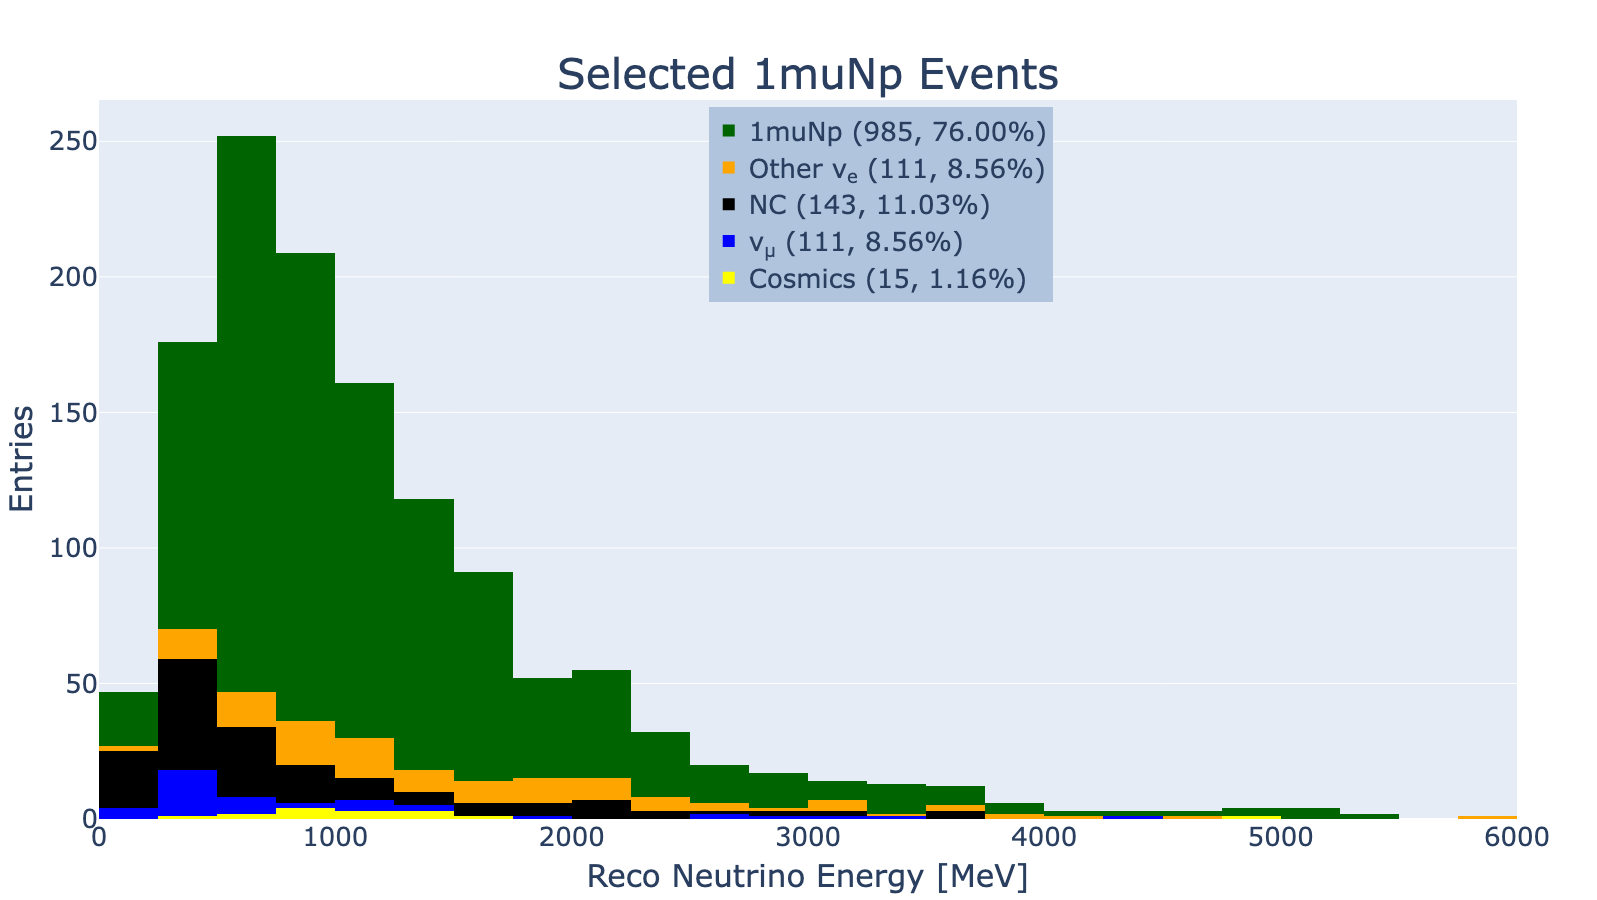

In [31]:
#hist_1d('reco_nu_energy',[0,5000],[0,5000,250],'Reco Neutrino Energy [MeV]','Selected 1e1p Events','1e1p')
hist_1d('visible_energy_reco',[0,6000],[0,6000,250],'Reco Neutrino Energy [MeV]','Selected 1muNp Events','1muNp')
#hist_1d('reco_nu_energy',[0,5000],[0,5000,100],'Reco Neutrino Energy [MeV]','Selected CC \u03BD<sub>e</sub> Inclusive Events','Numu')

In [32]:
def get_stat_cov(bins):
    stat_cov = np.diag(bins)
    stat_err = np.sqrt(np.diagonal(stat_cov))
    return stat_cov, stat_err

In [33]:
def hist_1d_norm(metric, y_axis,bounds,bin_size, xaxis_name, Plot_title, selection):
    fig = make_subplots(rows=1,cols=1,subplot_titles = (Plot_title,))
 #signal,sel_1mu, sel_1mu1pi1p, sel_nue_other, sel_NC, sel_cosmic,sel_numu,sel_other
    signal,sel_1mu, sel_1mu1pi1p, sel_numu_other, sel_NC, sel_cosmic,sel_numu,sel_other,total_events = MC_selection(df_selected_nu,metric)
    data_1muNp = data_selection(df_data,metric)
    #print(data_1muNp)
    energy_limit = bounds[1]
    accuracy_sel,accuracy_1muNp,accuracy_numu=[],[],[]
    error_sel = {'high': [],'low': []} 
    error_1muNp={'high':[],'low':[]}
    error_numu={'high':[],'low':[]}
    counts=[]
    energy_bin = []
    print('Purity: ', len(signal)/total_events)
    print('Number of signal: ',len(signal),' Number of selected:', total_events)
    cosmic_size = len(sel_cosmic)
    numu_size = len(sel_numu)
    NC_size = len(sel_NC)
    signal_size = len(signal)
    numu_size = len(sel_numu_other)
    other_size = len(sel_other)
    data_sel = {'Data':[],'UnNormalized':[]}
    pur_sel = {'Cosmics':[],'\u03BD<sub>\u03BC</sub>':[],'NC':[],'Other \u03BD<sub>e</sub>':[],'Signal':[]}
    for b in range(int(energy_limit/bin_size)):
        data_sel['UnNormalized'].append(len([x for x in data_1muNp if x >=b*bin_size and x < (b+1)*bin_size]))
        #print(len([x for x in data_1eNp if x >=b*bin_size and x < (b+1)*bin_size])/len(data_1eNp))
        data_sel['Data'].append(len([x for x in data_1muNp if x >=b*bin_size and x < (b+1)*bin_size])/len(data_1muNp))
        pur_sel['Signal'].append(len([x for x in signal if x >=b*bin_size and x < (b+1)*bin_size])/total_events)
        pur_sel['Cosmics'].append(len([x for x in sel_cosmic if x >=b*bin_size and x < (b+1)*bin_size])/total_events)
        pur_sel['\u03BD<sub>\u03BC</sub>'].append(len([x for x in sel_numu if x >=b*bin_size and x < (b+1)*bin_size])/total_events)
        pur_sel['NC'].append(len([x for x in sel_NC if x >=b*bin_size and x < (b+1)*bin_size])/total_events)
        if selection != 'Numu':
            pur_sel['Other \u03BD<sub>e</sub>'].append(len([x for x in sel_1mu if x >=b*bin_size and x < (b+1)*bin_size])/total_events)
            pur_sel['Other \u03BD<sub>e</sub>'][b]+=len([x for x in sel_1mu1pi1p if x >=b*bin_size and x < (b+1)*bin_size])/total_events
            pur_sel['Other \u03BD<sub>e</sub>'][b]+=len([x for x in sel_numu_other if x >=b*bin_size and x < (b+1)*bin_size])/total_events

                
            
        energy_bin.append(((b+1)*bin_size)-(bin_size/2))
    bins_data = np.array(data_sel['UnNormalized'])
    stat_cov_data,stat_err_data = get_stat_cov(bins_data)
    stat_cov_data_frac = stat_cov_data / np.outer(bins_data, bins_data)
    scaledata = 1/np.sum(bins_data)
    bins_data_scaled = bins_data * scaledata
    stat_cov_data_scaled = np.outer(bins_data_scaled, bins_data_scaled) * stat_cov_data_frac
    stat_err_data_scaled = np.sqrt(np.diag(stat_cov_data_scaled))
    bins_data = bins_data_scaled
    stat_cov_data = stat_cov_data_scaled
    stat_err_data = stat_err_data_scaled
    #mask = (df['reco_electron_conversion_dist']<2) #& (df['reco_electron_energy'] > 80)
    #Create the masks for histograms
    fig.add_trace(go.Scatter(x=energy_bin, y=data_sel['Data'],marker_color = 'black',mode='markers',name = f'Data',error_x=dict(
            type='data',
            array=[bin_size/2]*len(energy_bin)),
            error_y=dict(
            type='data',
            visible=True,
            array=stat_err_data,)
            ),row = 1, col =1)
    color = ['yellow','blue','pink','orange','green','pink','cyan','lime','brown','gray','red']
    lists = [sel_cosmic,sel_numu,sel_NC,sel_numu_other,signal]
    for i,key in enumerate(pur_sel):
        fig.add_trace(go.Bar(x=energy_bin, y=pur_sel[key],width = [bin_size]*len(energy_bin),marker_color = color[i],name = f'{key}: {(len(lists[i])/total_events)*100:.2f}%'),row = 1, col =1)
    
    #fig.add_trace(go.Bar(x=energy_bin, y=eff_sel['signal'],width = [bin_size]*len(energy_bin),marker_color = 'green',name = 'Signal'),row = 1, col =1)
    #fig.add_trace(go.Scatter(x=energy_bin, y=eff_sel['signal'],marker_color = 'green',name = 'Signal',mode='markers',error_x=dict(type='data',array=[bin_size/2]*len(energy_bin))),row = 1, col =1)
    #if selection == '1e1p':
    #    fig.add_trace(go.Scatter(x=energy_bin, y=eff_sel['1eNp'],marker_color = 'black',name = '1eNp',mode='markers',error_x=dict(type='data',array=[bin_size/2]*len(energy_bin))),row = 1, col =1)
    #if selection != "Numu Inclusive":
    #    fig.add_trace(go.Scatter(x=energy_bin, y=eff_sel['1e'],marker_color = 'yellow',name = '1e',mode='markers',error_x=dict(type='data',array=[bin_size/2]*len(energy_bin))),row = 1, col =1)
    #    fig.add_trace(go.Scatter(x=energy_bin, y=eff_sel['1e1pi1p'],marker_color = 'blue',name = '1e1pi1p',mode='markers',error_x=dict(type='data',array=[bin_size/2]*len(energy_bin))),row = 1, col =1)
    #    fig.add_trace(go.Scatter(x=energy_bin, y=eff_sel['numu'],marker_color = 'orange',name = 'numu',mode='markers',error_x=dict(type='data',array=[bin_size/2]*len(energy_bin))),row = 1, col =1)
    #fig.add_trace(go.Scatter(x=energy_bin, y=eff_sel['no_e'],marker_color = 'pink',name = 'no_e',mode='markers',error_x=dict(type='data',array=[bin_size/2]*len(energy_bin))),row = 1, col =1)
    #fig.add_trace(go.Scatter(x=energy_bin, y=eff_sel['e2g'],marker_color = 'cyan',name = 'e2g',mode='markers',error_x=dict(type='data',array=[bin_size/2]*len(energy_bin))),row = 1, col =1)
    #fig.add_trace(go.Scatter(x=energy_bin, y=eff_sel['Ne'],marker_color = 'lime',name = 'Ne',mode='markers',error_x=dict(type='data',array=[bin_size/2]*len(energy_bin))),row = 1, col =1)
    #fig.add_trace(go.Scatter(x=energy_bin, y=eff_sel['uncontained'],marker_color = 'brown',name = 'uncontained',mode='markers',error_x=dict(type='data',array=[bin_size/2]*len(energy_bin))),row = 1, col =1)
    #fig.add_trace(go.Scatter(x=energy_bin, y=eff_sel['flash'],marker_color = 'gray',name = 'flash',mode='markers',error_x=dict(type='data',array=[bin_size/2]*len(energy_bin))),row = 1, col =1)
    #fig.add_trace(go.Scatter(x=energy_bin, y=eff_sel['other'],marker_color = 'red',name = 'other',mode='markers',error_x=dict(type='data',array=[bin_size/2]*len(energy_bin))),row = 1, col =1)
    
    fig.update_layout(font = dict(size=26),legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.5,
        bgcolor="LightSteelBlue",
            bordercolor="Black",
    ))
    fig.update_xaxes(title_text = xaxis_name,row = 1, col = 1)
    fig.update_annotations(font_size=36)
    fig.update_yaxes(title_text = f"Entries Normalized ",row = 1, col = 1)
    fig.update_layout(barmode='stack')
    fig.update_layout(xaxis = dict(range = bounds))
    fig.update_layout(yaxis = dict(range = y_axis))
    fig.update_layout(height = 900, width = 900,showlegend = True)
    fig.show()